## **ML Model for Auto Insurance Industry**

**About Project:**

To Predicts the probability that a driver will initiate an auto insurance claim in the next year.

Most companies charge a flat premium to the customers irrespective of their risk for filing an insurance claim. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones. This project will help the insurance company in following ways:

Affluent customer: Company can attract the good drivers if it is doing the fair pricing. 
Loss ratio: Company can avoid specific customer/policies if they are at high risk of filing claim which in turn decrease loss ratio. 
Fair pricing: Company can charge the premium to the customers by their risk, and accurate prediction will allow them to tailor their prices further. 
Claim forecast: Claim is proportional to the number of risky customers, so company forecast the number of claims it could get next year which will help them to manage their fund better.

## **Import required libraries.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
#Importing sklearn library Imputer for imputing mean and mode in varaibles
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

## **Load Data**

In [2]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [3]:
train.shape

(595212, 59)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## **1. Three important inferences from the data above :**

Ans: 
1. The data consists of 595212 rows and 59 columns. Thus there are 59 features which are either categorical, interval, ordinal or binary. 
2. There are no null values.
3. Inorder to handle and manipulate data easily during data exploration Metadata DataFrame may be created.

# Count of target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


target
0    573518
1     21694
Name: target, dtype: int64

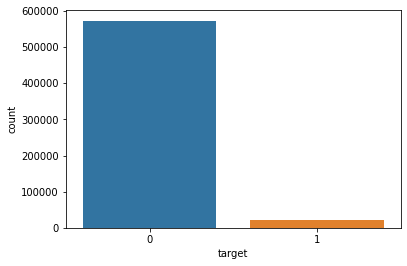

In [5]:
sns.countplot(train.target)
train.groupby('target')['target'].count()

# **2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?**

Ans:
Data is highly imbalanced with only ~3% of target data belongs to minority class(1).
Hence, the targets 0 and 1 are not in right proportion.

# **8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance.**

Ans: Above bar plot shows, in target data there are total 573518 0s and 21694 1s. The 1s are only ~3% of 0s. Hence target data is not proportionate and there is imbalance.

# **9. What should be the preferred way in this case to balance the data?**

Ans: Need to do upscaling/downsampling of data in this case to balance the data and to get the desired results.

# **Exploratory Data Analysis:**

# Creating MetaData DataFrame for analysis

In [6]:
#role: input, ID, target
#level: categorical, interval, ordinal, binary
#keep: True or False
#dtype: int, float, str

MetaData = pd.DataFrame(columns=['variable','role', 'level', 'keep', 'dtype'])
data =[]
for columns in train.columns:
    
    #Defining Role
    
    if columns == 'id':
        role = 'id'
    elif columns == 'target':
        role = 'target'
    else:
        role = 'input'
        
    #Defining DataTypes
    
    dtype = train[columns].dtype
    
    #Defining keep
    
    keep = True
    
    #Defining Level
    
    if columns[-3:] == 'bin' or columns == 'target':
        level = 'binary'
    elif columns[-3:] == 'cat' or columns == 'id':
        level = 'categorical' 
    elif train[columns].dtype == float:
        level = 'interval'
    elif train[columns].dtype == int:
        level = 'ordinal'
        
        
    f_dict = {
        'variable' : columns,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    
    data.append(f_dict)

MetaData = MetaData.append(data)

print(MetaData)

          variable    role        level  keep    dtype
0               id      id  categorical  True    int64
1           target  target       binary  True    int64
2        ps_ind_01   input      ordinal  True    int64
3    ps_ind_02_cat   input  categorical  True    int64
4        ps_ind_03   input      ordinal  True    int64
5    ps_ind_04_cat   input  categorical  True    int64
6    ps_ind_05_cat   input  categorical  True    int64
7    ps_ind_06_bin   input       binary  True    int64
8    ps_ind_07_bin   input       binary  True    int64
9    ps_ind_08_bin   input       binary  True    int64
10   ps_ind_09_bin   input       binary  True    int64
11   ps_ind_10_bin   input       binary  True    int64
12   ps_ind_11_bin   input       binary  True    int64
13   ps_ind_12_bin   input       binary  True    int64
14   ps_ind_13_bin   input       binary  True    int64
15       ps_ind_14   input      ordinal  True    int64
16       ps_ind_15   input      ordinal  True    int64
17   ps_in

**Distribution of variables along the levels in MetaData dataframe**

In [7]:
MetaData.groupby('level')[['variable']].count()

,variable
level,
binary,18
categorical,15
interval,10
ordinal,16


# **3. How many categorical features are there?**

Ans: There are 15 categorical features.

# **4. How many binary features are there?**

Ans: There are 18 binary features.

# Descriptive statistics

In [8]:
#Interval Variables

v = MetaData[(MetaData.level == 'interval') & (MetaData.keep)].variable
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**5. Write inferences from data on interval variables.**

Ans:
1. There are 10 interval features.
2. Three of them; ps_reg_03, ps_car_12 and ps_car_14 have min. as -1. Those -1 values will be missing values.



In [9]:
#Ordinal Variables

v = MetaData[(MetaData.level == 'ordinal') & (MetaData.keep)].variable
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


**6. Write inferences from data on ordinal variables.**

Ans:
1. There are 16 ordinal features.
2. One of them; ps_car_11 has min. as -1. Those -1 values will be missing values.

In [10]:
#Binary Variables

v = MetaData[(MetaData.level == 'binary') & (MetaData.keep)].variable
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **7. Write inferences from data on binary variables.**

Ans:
1. There are 18 binary features.
2. More than 75% of the Target binary variable is 0. Hence the data is highly imbalanced.

# **Missing Values**

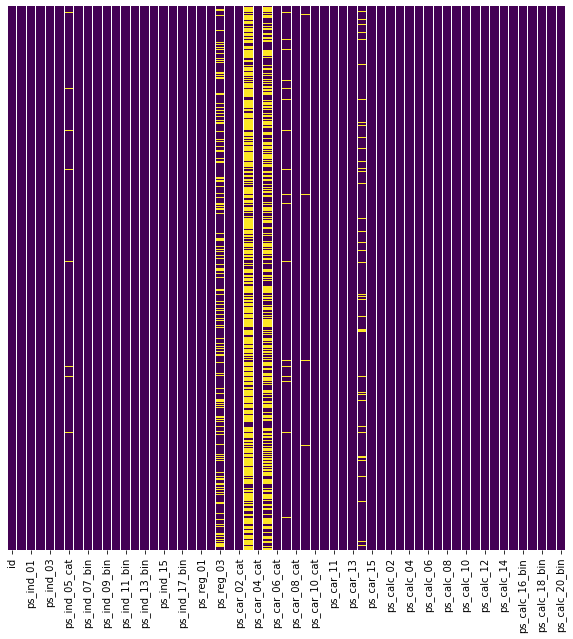

In [11]:
#Creating the heatmap for missing values using seaborn library
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train == -1, yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("MissingValueHeatMap.png", bbox_inches = "tight")

In [12]:
#Checking variables for missing values
missing = []
for columns in train.columns:
    missing_count = train[train[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count*100/train.shape[0]
        
        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))
        
print('\nIn total, there are {} variables with missing values'.format(len(missing)))

Variable ps_ind_02_cat has 216 missing with 0.036290 percentage
Variable ps_ind_04_cat has 83 missing with 0.013945 percentage
Variable ps_ind_05_cat has 5809 missing with 0.975955 percentage
Variable ps_reg_03 has 107772 missing with 18.106490 percentage
Variable ps_car_01_cat has 107 missing with 0.017977 percentage
Variable ps_car_03_cat has 411231 missing with 69.089837 percentage
Variable ps_car_05_cat has 266551 missing with 44.782531 percentage
Variable ps_car_07_cat has 11489 missing with 1.930237 percentage
Variable ps_car_09_cat has 569 missing with 0.095596 percentage
Variable ps_car_11 has 5 missing with 0.000840 percentage
Variable ps_car_12 has 1 missing with 0.000168 percentage
Variable ps_car_14 has 42620 missing with 7.160474 percentage

In total, there are 12 variables with missing values


# **11. Which are the top two features in terms of missing values?**

Ans: ps_car_03_cat with 69% and ps_car_05_cat with 44.7% are the top two features in terms of missing values.

# **12. In total, how many features have missing values?**

Ans : In total, there are 12 features with missing values.

# **13. What steps should be taken to handle the missing data?**

Ans : 
* We can remove the top two variables (ps_car_03_cat and ps_car_05_cat) with high missing values.
* For other variables, we can do missing value treatment by substituting mean and mode.
* Missing values in Categorical variables can be replaced by the mode value in that variable.

# Handling missing values

In [13]:
#Updating the MetaData DataFrame for ps_car_03_cat and ps_car_05_cat removal (Keep = False)
MetaData.loc[MetaData['variable'] == 'ps_car_03_cat', 'keep'] = False
MetaData.loc[MetaData['variable'] == 'ps_car_05_cat', 'keep'] = False

In [14]:
#Removing variables that has high missing value count i.e ps_car_03_cat and ps_car_05_cat

train1 = train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

In [15]:
#Checking dataframe after removing the 2 variables
#Number of variables at this point: 57

train1.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [16]:
# Imputing with the mean or mode----only non categorical variables

mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train1['ps_reg_03'] = mean_imp.fit_transform(train1[['ps_reg_03']]).ravel()
train1['ps_car_12'] = mode_imp.fit_transform(train1[['ps_car_12']]).ravel()
train1['ps_car_14'] = mean_imp.fit_transform(train1[['ps_car_14']]).ravel()
train1['ps_car_11'] = mode_imp.fit_transform(train1[['ps_car_11']]).ravel()

In [17]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
#Imputing missing values in categorical variables by there Mode

missing = [ i for i in missing if not i in vars_to_drop]

for columns in missing:
    train1.loc[train1[columns] == -1, columns] = train1[columns].mode()[0]

In [18]:
#Checking the data frame after imputing missing values

train1.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.894047,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [19]:
#Checking missing values in the data, if any.

missing = []

for columns in train1.columns:
    missing_count = train1[train1[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count/train1.shape[0]
        
        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))
        
print('\nIn total, there are {} variables with missing values'.format(len(missing)))


In total, there are 0 variables with missing values


In [20]:
#Checking dataframe shape

train1.shape

(595212, 57)

# Correlation between Variables

In [21]:
#Creating list of variables based on the levels 

for variable in MetaData.variable:
    IntervalVar = MetaData[MetaData.level=='interval']['variable']
    CategoricalVar = MetaData[MetaData.level=='categorical']['variable']
    BinaryVar = MetaData[MetaData.level=='binary']['variable']
    OrdinalVar = MetaData[MetaData.level=='ordinal']['variable']

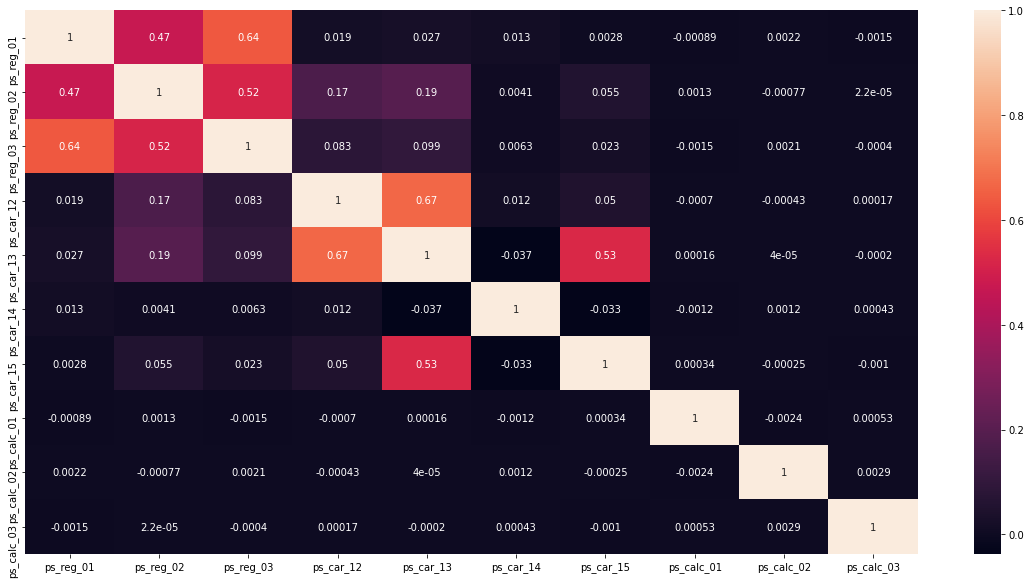

In [22]:
#Correlation Heatmap of the interval variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train[IntervalVar].corr(), annot=True)

**14. Which interval variables have strong correlation?**

Ans : In Interval variables we can see following set of variables are highly correlated :- (ps_reg_01, ps_reg_02, ps_reg_03),(ps_car_12 & ps_car_13), (ps_car_13 & ps_car_15).

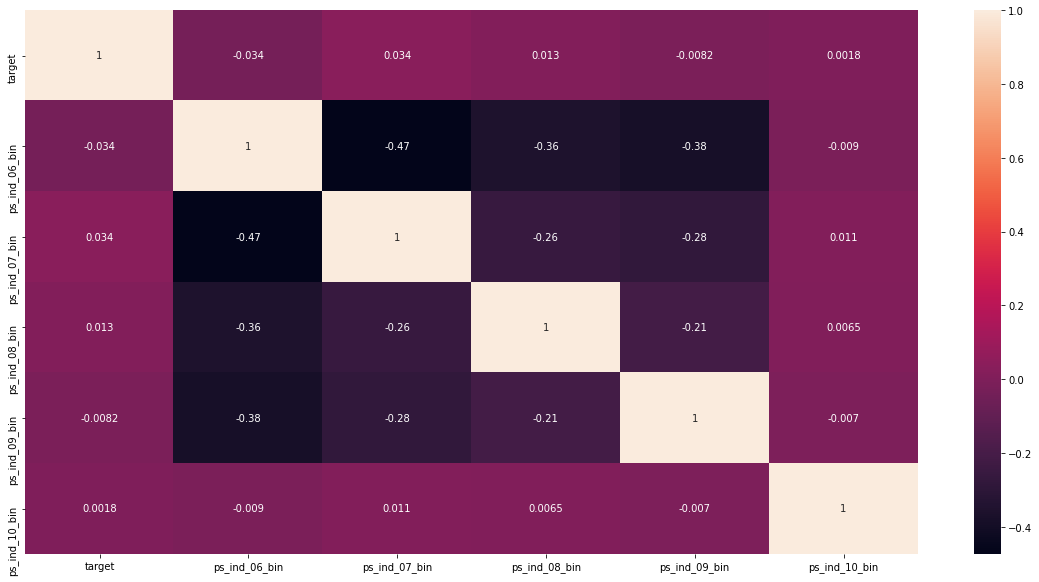

In [23]:
#Zoomed Correlation Heatmap of 'ind' variables  

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train.loc[:, ["target", "ps_ind_06_bin","ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin","ps_ind_10_bin"] ].corr(), annot=True)

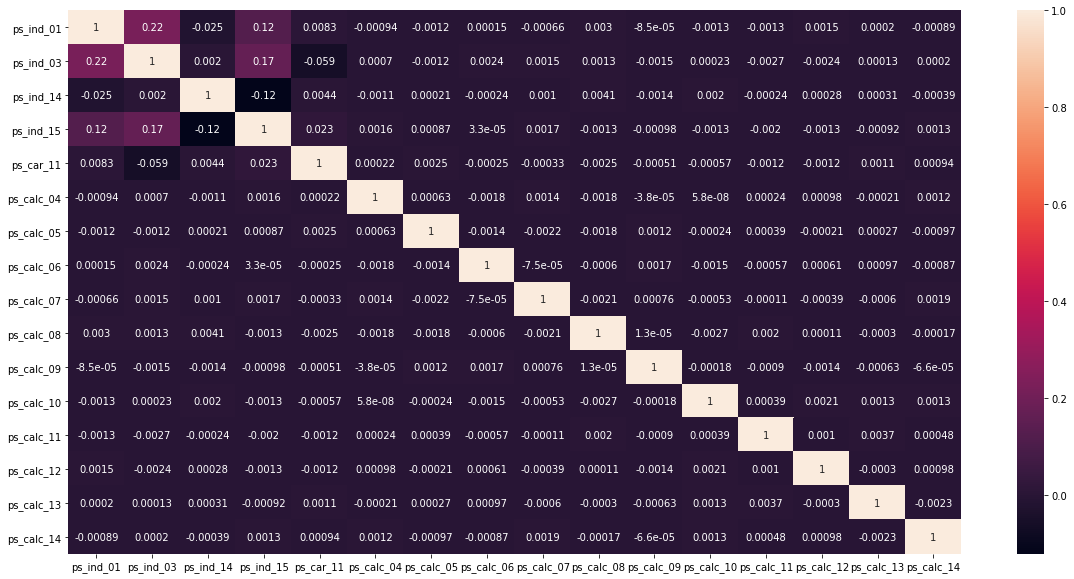

In [24]:
#Correlation Heatmap of Ordinal variables  

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train[OrdinalVar].corr(), annot=True)

**15. What's the level of correlation among ordinal features?**

Ans : Very few ordinal variables are correlated to each other and also the level of correlation among them are small.

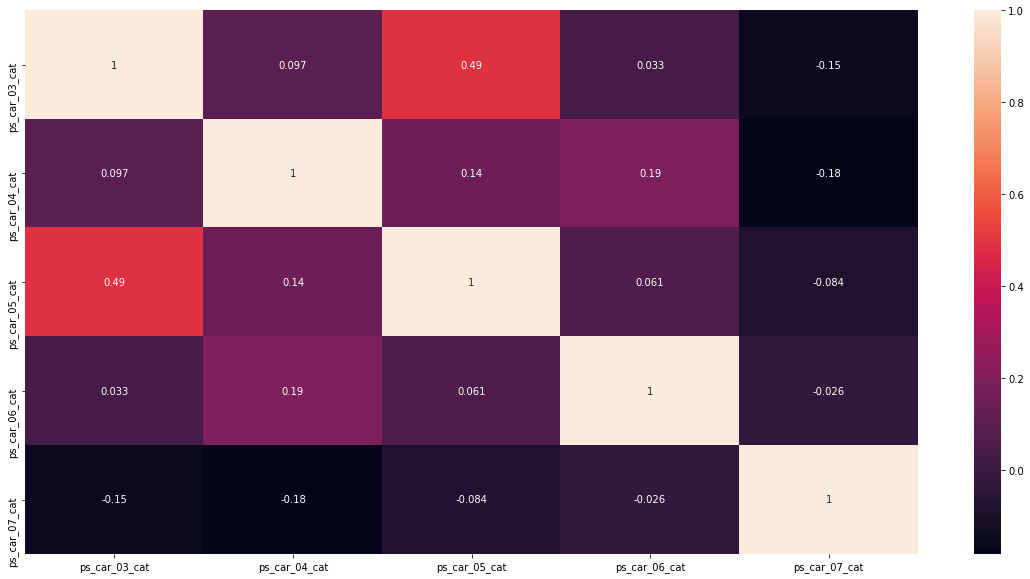

In [25]:
#Zoomed Heatmap of 'car' categorical variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train.loc[:, ["ps_car_03_cat","ps_car_04_cat","ps_car_05_cat","ps_car_06_cat","ps_car_07_cat"]].corr(), annot=True)

#Findings of categorical variable correlation :

* ps_ind_06_bin and ps_ind_07_bin are significantly correlated in 'ind' variables
* ps_car_03_cat and ps_cat_05_cat are significantly correlated in 'car' categorical variables

# **Cardinality check for categorical variables**

In [26]:
#Checking the cardinality of each categorical variable

v = MetaData[(MetaData.level == 'categorical') & (MetaData.keep)].index

for f in v:
    dist_values = train.iloc[:,f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable 0 has 595212 distinct values
Variable 3 has 5 distinct values
Variable 5 has 3 distinct values
Variable 6 has 8 distinct values
Variable 23 has 13 distinct values
Variable 24 has 2 distinct values
Variable 26 has 10 distinct values
Variable 28 has 18 distinct values
Variable 29 has 3 distinct values
Variable 30 has 2 distinct values
Variable 31 has 6 distinct values
Variable 32 has 3 distinct values
Variable 33 has 104 distinct values


**Variable 33 (ps_car_11_cat) has 104 distinct values.**

#Handling Categorical Variables
#Creating dummy variables using get_dummies

**16. Implement Hot Encoding/get_dummies for categorical features**

In [27]:
#Creating list of categorical variables

cat_feat = MetaData[(MetaData.level == 'categorical') & (MetaData.keep == True)].variable

In [28]:
#Creating dummy variables of categorical variables except variable - ps_car_11_cat as it conatins more than 100 categories and id as it is unique.

v = MetaData[(MetaData.level == 'categorical') & (MetaData.keep)].variable
v = [w for w in list(v) if w!='id' and w!='ps_car_11_cat']

In [29]:
#Printing number of variables before and after dummification

print('Before dummification we have {} variables in train'.format(train1.shape[1]))
train2 = pd.get_dummies(train1, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train2.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 102 variables in train


# **10. What is the increase in number of features after one-hot encoding of the data?**

Ans : After dummification, there is an increase of 45 features.

# Removing calculated variables

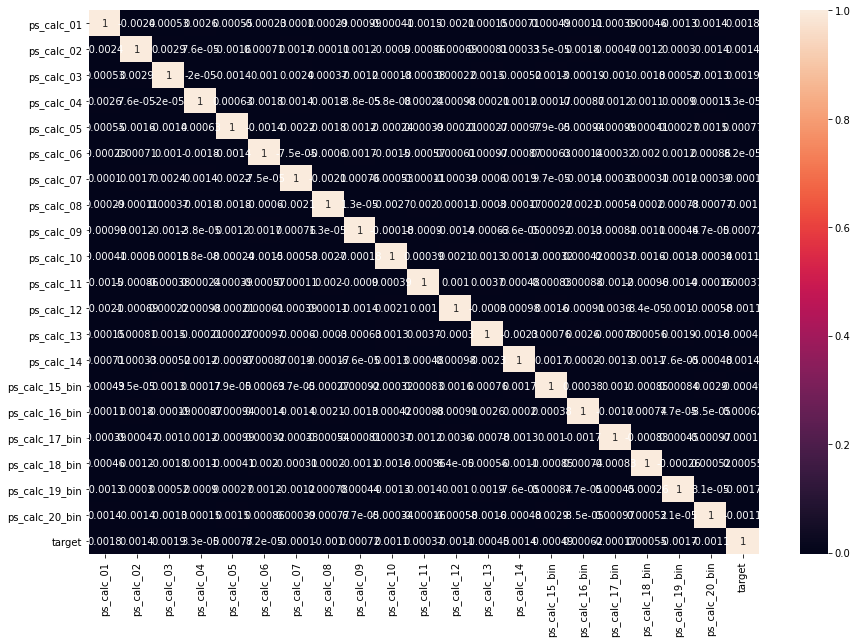

In [30]:
# Now working for correlation in "calc"
calc_col_new = [w for w in train2.columns if 'calc' in w]
calc_col_new.append("target")
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(train2[calc_col_new].corr(), annot= True)

In [31]:
#Removing calculated variables since there correlation with target variable is non significant

column_excluding_calc  = [w for w in train2.columns if "calc" not in w]
train3 = train2[column_excluding_calc]

In [32]:
#Checking shape of data frame after removing calculated variables

train3.shape

(595212, 82)

# Outlier

In [33]:
#Detecting outlier

from collections import Counter

def detect_outlier(df):
    features = df.columns
    outliers  = []
    for i, feature in enumerate(features):
        if df[feature].dtype == 'float64':
            # Calculate Q1 (25th percentile of the data) for the given feature
            Q1 = np.percentile(df[feature], 25)
            # Calculate Q3 (75th percentile of the data) for the given feature
            Q3 = np.percentile(df[feature], 75)
            # Use the interquartile range to calculate an outlier step
            step = 1.5 * (Q3 - Q1)
            feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
            outliers.extend(list(feature_outliers.index.values))
            print('Feature: {}, outliers: {}\n'.format(feature, len(feature_outliers.index)))
    
    multi_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
    return multi_feature_outliers

In [34]:
#Printing the variables and number of outliers

outliers  = detect_outlier(train3.drop(['id', 'target'], axis = 1))

Feature: ps_reg_01, outliers: 0

Feature: ps_reg_02, outliers: 36793

Feature: ps_reg_03, outliers: 35514

Feature: ps_car_12, outliers: 15355

Feature: ps_car_13, outliers: 26913

Feature: ps_car_14, outliers: 30420

Feature: ps_car_15, outliers: 27409



In [35]:
#Removing outliers from the data

train4 = train3.drop(train3.index[list(outliers)]).reset_index(drop = True)

print('Number of outliers occur more than one feature: {}'.format(len(outliers)))
print('Shape of old data: {}'.format(train3.shape))
print('Shape of new data: {}'.format(train4.shape))

Number of outliers occur more than one feature: 41346
Shape of old data: (595212, 82)
Shape of new data: (553866, 82)


# Variable reduction

In [36]:
ind_col = [w for w in train4.columns if 'ind' in w]
reg_col = [w for w in train4.columns if 'reg' in w]
car_col = [w for w in train4.columns if 'car' in w]

In [37]:
#Creating interaction variables for 'reg' variables since they are highly correlated
#Taking sum of reg variable

train4["sum_reg"] = train4["ps_reg_01"] + train4["ps_reg_02"] + train4["ps_reg_03"]

#Droping variables 'ps_reg_01 and ps_reg02

train5 = train4.drop(["ps_reg_01", "ps_reg_02"], axis = 1)

In [38]:
#Checking shape of dataframe after removal of correlated variables and addition of interaction variable

train5.shape

(553866, 81)

**Removing low variance variables from the dataframe**

In [39]:
#Checking the number of low variance variables in the data using VarianceThreshold from sklearn feature_selection 

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.01)
selector.fit(train5.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train5.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

25 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_13', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2']


In [40]:
#Dropping the low variance variables from the data and checking the shape of the final dataframe

train5 = train5.drop(list(v), axis = 1)
train5.shape

(553866, 56)

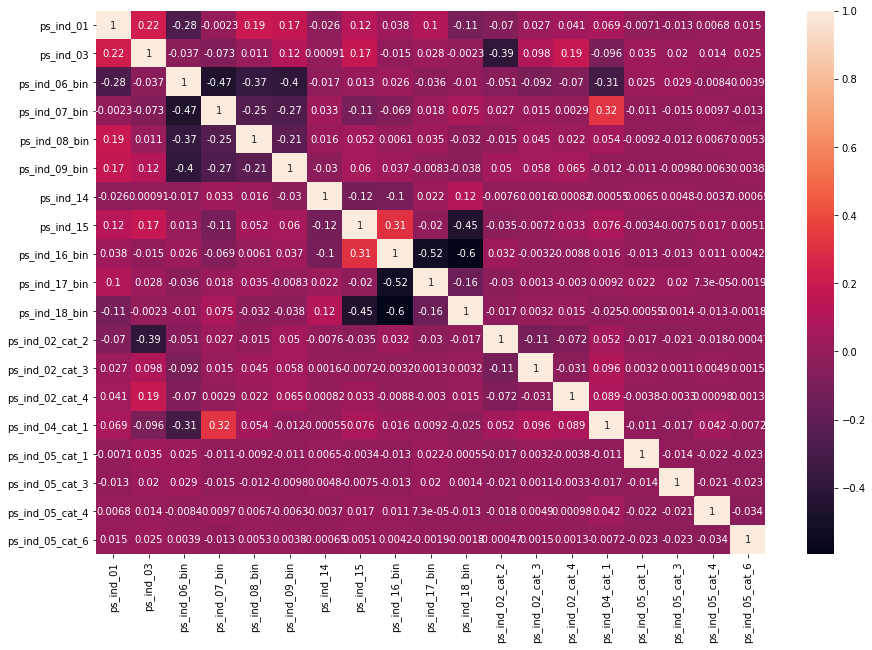

In [41]:
# Now working for correlation in "IND"
ind_col_new = [w for w in train5.columns if 'ind' in w]
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(train5[ind_col_new].corr(), annot= True)

In [42]:
# PS_ind_06_bin and PS_ind_07_bin high correlation - so we drop PS_ind_06_bin
# ps_ind_16_bin corr with ps_ind_17_bin and ps_ind_18_bin so we drop ps_ind_16_bin
train5 = train5.drop(["ps_ind_06_bin", "ps_ind_16_bin"], axis = 1)

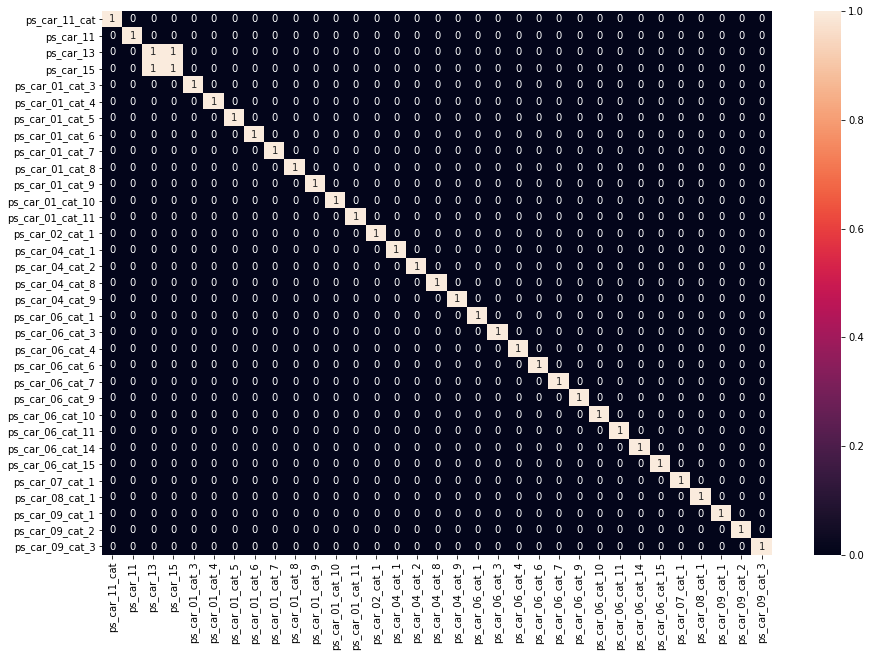

In [43]:
#Checking correlation of 'car' variables

car_col_new = [w for w in train5.columns if 'car' in w]
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(train5[car_col_new].corr() > 0.5, annot= True)

In [44]:
#Droping variable 'ps_car_15' as it is highly correlated with the variable 'ps_car_13' and checking the shape of resulting
#dataframe

train5 = train5.drop(["ps_car_15"], axis = 1)
train5.shape

(553866, 53)

# **17. In nominal and interval features, which features are suitable for StandardScaler?**

Ans: Features suitable for StandardScaler are
* In nominal : ps_ind_02_cat_2, ps_ind_02_cat_3, ps_ind_02_cat_4, ps_ind_04_cat_1, ps_ind_05_cat_1, ps_ind_05_cat_3, ps_ind_05_cat_4, ps_ind_05_cat_5, ps_car_01_cat_3, ps_car_01_cat_4, ps_car_01_cat_5, ps_car_01_cat_6, ps_car_01_cat_7, ps_car_01_cat_8, ps_car_01_cat_9, ps_car_01_cat_10, ps_car_01_cat_11, ps_car_02_cat_1, ps_car_04_cat_1, ps_car_04_cat_2, ps_car_04_cat_8, ps_car_04_cat_9, ps_car_06_cat_1, ps_car_06_cat_3, ps_car_06_cat_4, ps_car_06_cat_6, ps_car_06_cat_7, ps_car_06_cat_9, ps_car_06_cat_10, ps_car_06_cat_11, ps_car_06_cat_14, ps_car_06_cat_15,
* In interval features : ps_reg_sum, ps_reg_03, ps_car_12, ps_car_13, ps_car_14

# Test train split with handling imbalance class

**Splitting the dataframe into test and train dataset for model building. 
Split is done in 70:30 ratio**

In [45]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(train5.drop(['target', 'id'], axis=1),
                                                    train5['target'].astype(int), test_size=0.30, random_state=101)

# **Balance the training data by downsample and upsampling**

In [46]:
df_train_temp = X_train
df_train_temp['target'] = y_train

In [47]:
df_minority = df_train_temp[df_train_temp.target==1]
df_minority.shape

(13636, 52)

**Downsampling**

In [48]:
df_majority = df_train_temp[df_train_temp.target==0]
df_minority = df_train_temp[df_train_temp.target==1]
 
# Upsample majority class
df_majority_undersampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=13566*8,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])
 
# Display new class counts
df_undersampled.target.value_counts()

0    108528
1     13636
Name: target, dtype: int64

**10. How many training records are there after achieving a balance of 12%?**

Ans : After achieving a balance of 12%, the training records are 
* 0    -   108528
* 1    -    13636

**Upsampling**

In [49]:
from sklearn.utils import resample
df_majority = df_undersampled[df_undersampled.target==0]
df_minority = df_undersampled[df_undersampled.target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=13566*2,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()

0    108528
1     27132
Name: target, dtype: int64

In [50]:
X_train_res = df_upsampled.drop('target', axis = 1)
y_train_res = df_upsampled.target

# **Balance the testing data by downsample and upsampling**

In [51]:
df_test_temp = X_test
df_test_temp['target'] = y_test

In [52]:
df_minor = df_test_temp[df_test_temp.target==1]
df_major = df_test_temp[df_test_temp.target==0]
print(df_minor.shape)
print(df_major.shape)

(5718, 52)
(160442, 52)


**Downsampling**

In [53]:
# Upsample major class
df_major_undersampled = resample(df_major, 
                                 replace=True,     # sample with replacement
                                 n_samples=5718*8,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_major_undersampled, df_minor])
 
# Display new class counts
df_undersampled.target.value_counts()

0    45744
1     5718
Name: target, dtype: int64

**Upsampling**

In [54]:
df_major = df_undersampled[df_undersampled.target==0]
df_minor = df_undersampled[df_undersampled.target==1]
# Upsample minority class
df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=5718*2,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_major, df_minor_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()

0    45744
1    11436
Name: target, dtype: int64

In [55]:
X_test_res = df_upsampled.drop('target', axis = 1)
y_test_res = df_upsampled.target

# Feature Scaling

In [56]:
mms = StandardScaler()
X_train_res_scaled = mms.fit_transform(X_train_res)
X_test_res_scaled = mms.fit_transform(X_test_res)

# **18. Summarize the learnings of ED**

Ans : Learnings of EDA:

* There were no null values in the data.
* For the 59 features Metadata DataFrame was ceated and the datas were classified as Categorical, binary, ordinal and interval.
* -1 values in 12 of these features indicated missing values. Top two features among them were removed. Others were substituted with mode(Categorical) or mean.  
* Dummy variables were created for categorical variables(Except for 'ID').
* Variables were further reduced after checking for their strong correlations. Certain variables which showed least correlation to the target were also removed.
* Outliers were detected and those rows were removed. 
* The cleaned data was then split into X_train, X_test,y_train & y_test.
* The target showed high imbalance. By downsampling and upsampling the train and test data, balanced data is obtained.
* Now the X_train and X_test data is normalized with StandardScaler



# Machine Learning Models

# Simple Logistic Regression

In [57]:
#logistic_Regression

lm = LogisticRegression()
logistic_model = lm.fit(X_train_res_scaled, y_train_res)

predictions_LM = logistic_model.predict(X_test_res_scaled)
print('Accuracy Logistic Regression:')
print(accuracy_score(y_test_res,predictions_LM))
print('Classification Report Logistic Regression')
print(classification_report(y_test_res,predictions_LM))
print('Confusion Matrix Logistic Regression')
print(confusion_matrix(y_test_res,predictions_LM))

Accuracy Logistic Regression:
0.8002973067506121
Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     45744
           1       0.58      0.01      0.01     11436

    accuracy                           0.80     57180
   macro avg       0.69      0.50      0.45     57180
weighted avg       0.76      0.80      0.71     57180

Confusion Matrix Logistic Regression
[[45698    46]
 [11373    63]]


# **1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?**

Ans : The Simple Logistic Regression Model have high accuracy but we need good f1-score too for both the outcomes. The f1-score for the target value '1' is very close to zero. That means for '1' outcome we have high false positive and high false negative. Hence the model is a failure.
* Simple Logistic Regression Model seems to have high accuracy because of highly imbalanced data. When we use accuracy, we assign equal cost to false positives and false negatives. When that data set is imbalanced - say it has 96% of instances in one class and only 4 % in the other - there is a great way to lower the cost. Predict that every instance belongs to the majority class, get accuracy of 96% which is very high accuracy.

# **2. Why do you think f1-score is 0.0?**

Ans : The f1-score is ~0.0 as in the above Simple logistic Regression the recall is near 0. The F1-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall. In this model, the Recall is Zero due to which F1 score also become zero.

# **3. What is the precision and recall score for the model?**

Ans : For the model, the precision is 0.76(weighted avg.) and the recall is 0.80(weighted avg.). But for individual target values, 1s have 0.58 precision and 0.0 recall. 0s have 0.8 precision and 1.0 recall.

# **4. What is the most important inference you can draw from the result?**

Ans : The most important inference from the result above is even though we get high accuracy, good f1-score for the model; still if the f1-score for any individual outcome is poor, the model is a failure.

# Random forest

In [58]:
#Random forest

clf_RF = RandomForestClassifier(n_estimators=25, class_weight="balanced")
clf_RF.fit(X_train_res_scaled,y_train_res)
predictions_RF = clf_RF.predict(X_test_res_scaled)
print('Classification Report RandomForest Classifier')
print(classification_report(y_test_res,predictions_RF))
print('\n Confusion Matrix RandomForest Classifier')
print(confusion_matrix(y_test_res,predictions_RF))

Classification Report RandomForest Classifier
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     45744
           1       0.41      0.00      0.01     11436

    accuracy                           0.80     57180
   macro avg       0.60      0.50      0.45     57180
weighted avg       0.72      0.80      0.71     57180


 Confusion Matrix RandomForest Classifier
[[45668    76]
 [11384    52]]


# Improved Logistic Regression

In [59]:
#Randominzed logistic regression

logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1]}
clf_RLR = RandomizedSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)
clf_RLR = clf_RLR.fit(X_train_res_scaled,y_train_res)
predictions_RLR = clf_RLR.predict(X_test_res_scaled)
print('Classification Report RandomizedSearchCV')
print(classification_report(y_test_res,predictions_RLR))
print('\nConfusion Matrix RandomizedSearchCV')
print(confusion_matrix(y_test_res,predictions_RLR))

Classification Report RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.85      0.62      0.71     45744
           1       0.26      0.55      0.36     11436

    accuracy                           0.60     57180
   macro avg       0.55      0.58      0.53     57180
weighted avg       0.73      0.60      0.64     57180


Confusion Matrix RandomizedSearchCV
[[28164 17580]
 [ 5141  6295]]


# **5. What is the accuracy score and f1-score for the improved Logistic Regression model?**

Ans : For the improved Logistic Regression model, the accuracy score is 0.60 and f1-score is 0.64(weighted avg.). 

# **6. Why do you think f1-score has improved?**

Ans :  The f1-score for 1s has improved as we have used hyperparameter tuning with RandomizedSearchCV. The number of true 1s have increased.

# Linear SVC

In [60]:
# linearSVC with max_iter=1000 and dual=True
lsvc = LinearSVC(C=1.0, class_weight= 'balanced', dual=True, fit_intercept=True,
          intercept_scaling=1,  max_iter=1000,
          random_state=7, verbose=0)
lsvc.fit(X_train_res_scaled, y_train_res)
predictions = lsvc.predict(X_test_res_scaled)
print('Classification Report RandomForest Classifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix RandomForest Classifier')
print(confusion_matrix(y_test_res,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report RandomForest Classifier
[[28845 16899]
 [ 5352  6084]]

 Confusion Matrix RandomForest Classifier
              precision    recall  f1-score   support

           0       0.84      0.63      0.72     45744
           1       0.26      0.53      0.35     11436

    accuracy                           0.61     57180
   macro avg       0.55      0.58      0.54     57180
weighted avg       0.73      0.61      0.65     57180



# **7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement**


In [61]:
# linearSVC with max_iter=2000 and dual=True
lsvc1 = LinearSVC(C=1.0, class_weight= 'balanced', dual=True, fit_intercept=True,
          intercept_scaling=1,  max_iter=2000,
          random_state=7, verbose=0)
lsvc1.fit(X_train_res_scaled, y_train_res)
predictions = lsvc1.predict(X_test_res_scaled)
print('Classification Report RandomForest Classifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix RandomForest Classifier')
print(confusion_matrix(y_test_res,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report RandomForest Classifier
              precision    recall  f1-score   support

           0       0.85      0.62      0.72     45744
           1       0.26      0.55      0.36     11436

    accuracy                           0.61     57180
   macro avg       0.56      0.58      0.54     57180
weighted avg       0.73      0.61      0.64     57180


 Confusion Matrix RandomForest Classifier
[[28362 17382]
 [ 5183  6253]]


In [62]:
# linearSVC with max_iter=1000 and dual=False
lsvc2 = LinearSVC(C=1.0, class_weight= 'balanced', dual=False, fit_intercept=True,
          intercept_scaling=1,  max_iter=1000,
          random_state=7, verbose=0)
lsvc2.fit(X_train_res_scaled, y_train_res)
predictions = lsvc2.predict(X_test_res_scaled)
print('Classification Report RandomForest Classifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix RandomForest Classifier')
print(confusion_matrix(y_test_res,predictions))

Classification Report RandomForest Classifier
              precision    recall  f1-score   support

           0       0.85      0.62      0.71     45744
           1       0.26      0.55      0.36     11436

    accuracy                           0.60     57180
   macro avg       0.56      0.58      0.54     57180
weighted avg       0.73      0.60      0.64     57180


 Confusion Matrix RandomForest Classifier
[[28285 17459]
 [ 5162  6274]]


Ans : For Linear SVC model, there is no much improvement after changing the dual and max_iter parameters. When the dual is made False, the accuracy reduced by 0.01%.

# **8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?**

In [63]:
#Number of feature based on importance in Linear SVC
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(lsvc, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train_res_scaled.shape[1]))
train_feat = sfm.transform(X_train_res_scaled)
test_feat = sfm.transform(X_test_res_scaled)
n_features = train_feat.shape[1]
print('Number of features after selection: {}'.format(n_features))
#selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 51
Number of features after selection: 26


In [64]:
# linearSVC with feature optimization
lsvc3 = LinearSVC(C=1.0, class_weight= 'balanced', dual=True, fit_intercept=True,
          intercept_scaling=1,  max_iter=1000,
          random_state=7, verbose=0)
lsvc3.fit(train_feat, y_train_res)
predictions = lsvc3.predict(test_feat)
print('Classification Report linearSVC Classifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix linearSVC Classifier')
print(confusion_matrix(y_test_res,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report linearSVC Classifier
              precision    recall  f1-score   support

           0       0.85      0.62      0.72     45744
           1       0.27      0.55      0.36     11436

    accuracy                           0.61     57180
   macro avg       0.56      0.58      0.54     57180
weighted avg       0.73      0.61      0.64     57180


 Confusion Matrix linearSVC Classifier
[[28322 17422]
 [ 5147  6289]]


Ans : SVC even with feature optimization, there is no much improvement in the score.

# **XG-boost**

In [65]:
model = xgb.XGBClassifier(learning_rate =0.06, colsample_bytree=0.6,subsample=0.8,n_estimators=200,max_dept=3,gamma=0)
model.fit(X_train_res_scaled,y_train_res)
predictions = model.predict(X_test_res_scaled)
print('Accuracy XG-boost:')
print(accuracy_score(y_test_res,predictions))
print('Classification Report XG-Boost Classifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix XG-Boost Classifier')
print(confusion_matrix(y_test_res,predictions))

Accuracy XG-boost:
0.8005596362364463
Classification Report XG-Boost Classifier
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     45744
           1       0.63      0.01      0.01     11436

    accuracy                           0.80     57180
   macro avg       0.71      0.50      0.45     57180
weighted avg       0.77      0.80      0.71     57180


 Confusion Matrix XG-Boost Classifier
[[45698    46]
 [11358    78]]


# **9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?**

Ans : XGBoost is one the better classifiers -- but still f1-score is very low. The reason for this is to impose greater penalties for errors on the minor class, in this case any incidences of 1 in the response variable. The higher the weight, the greater penalty is imposed on errors on the minor class. The reason for doing this is because there are more 0s than 1s in the dataset. Therefore, in order to have an unbiased model, errors on the minor class need to be penalised more severely.

# **11. Is there any improvement in scores after encoding?**

Ans :  All the ML models have been done after encoding for optimum results.

# **12. If not missing a positive sample is the priority which model is best so far?**

Ans: If not missing a positive sample is the priority i.e; model with low false negative in confusion matrix or high avg recall, XGBoost is the best model so far.

# **13. If not marking negative sample as positive is top priority, which model is best so far?**

Ans : If not marking negative sample as positive is top priority i.e; high avg precision, XGBoost is best model so far.

# **Adaboost**

In [66]:
clf = RandomForestClassifier()
model = AdaBoostClassifier(learning_rate =1, n_estimators=50,base_estimator=clf)
model.fit(X_train_res_scaled,y_train_res)
predictions = model.predict(X_test_res_scaled)
print('Accuracy AdaBoost:')
print(accuracy_score(y_test_res,predictions))
print('Classification Report AdaBoost Classifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix AdaBoost Classifier')
print(confusion_matrix(y_test_res,predictions))

Accuracy AdaBoost:
0.7999650227352221
Classification Report AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     45744
           1       0.48      0.00      0.01     11436

    accuracy                           0.80     57180
   macro avg       0.64      0.50      0.45     57180
weighted avg       0.74      0.80      0.71     57180


 Confusion Matrix AdaBoost Classifier
[[45711    33]
 [11405    31]]


# **14. Do you think using AdaBoost can give any significant improvement over XGBoost?**

Ans : No, using AdaBoost do not give any significant improvement over XGBoost.

# MLPClassifier in neural network

In [67]:
# Training the 
# Hidden layer size = 10
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_train_res_scaled, y_train_res.values.ravel())

# Prediction on x_test
predictions = mlp.predict(X_test_res_scaled)
print('Accuracy MLPClassifier:')
print(accuracy_score(y_test_res,predictions))
print('Classification Report MLPClassifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix MLPClassifier')
print(confusion_matrix(y_test_res,predictions))

Accuracy MLPClassifier:
0.7984959776145505
Classification Report MLPClassifier
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     45744
           1       0.39      0.01      0.03     11436

    accuracy                           0.80     57180
   macro avg       0.60      0.50      0.46     57180
weighted avg       0.72      0.80      0.72     57180


 Confusion Matrix MLPClassifier
[[45507   237]
 [11285   151]]


In [69]:
# Training the model
# Hidden layer size = 64
mlp = MLPClassifier(hidden_layer_sizes=(10, 64, 10),activation='logistic', max_iter=200)
mlp.fit(X_train_res_scaled, y_train_res.values.ravel())

# Prediction on x_test
predictions = mlp.predict(X_test_res_scaled)
print('Accuracy MLPClassifier:')
print(accuracy_score(y_test_res,predictions))
print('Classification Report MLPClassifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix MLPClassifier')
print(confusion_matrix(y_test_res,predictions))

Accuracy MLPClassifier:
0.79900314795383
Classification Report MLPClassifier
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     45744
           1       0.37      0.01      0.01     11436

    accuracy                           0.80     57180
   macro avg       0.59      0.50      0.45     57180
weighted avg       0.72      0.80      0.71     57180


 Confusion Matrix MLPClassifier
[[45602   142]
 [11351    85]]


In [71]:
# Training the model
# Hidden layer size = 128, No. of hidden layer=2
mlp = MLPClassifier(hidden_layer_sizes=(10, 128, 64, 10),activation='logistic', max_iter=200)
mlp.fit(X_train_res_scaled, y_train_res.values.ravel())

# Prediction on x_test
predictions = mlp.predict(X_test_res_scaled)
print('Accuracy MLPClassifier:')
print(accuracy_score(y_test_res,predictions))
print('Classification Report MLPClassifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix MLPClassifier')
print(confusion_matrix(y_test_res,predictions))

Accuracy MLPClassifier:
0.8
Classification Report MLPClassifier
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     45744
           1       0.00      0.00      0.00     11436

    accuracy                           0.80     57180
   macro avg       0.40      0.50      0.44     57180
weighted avg       0.64      0.80      0.71     57180


 Confusion Matrix MLPClassifier
[[45744     0]
 [11436     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Training the model
# Hidden layer size = 256, No. of hidden layer=3
mlp = MLPClassifier(hidden_layer_sizes=(10, 256, 128, 64, 10),activation='logistic', max_iter=200)
mlp.fit(X_train_res_scaled, y_train_res.values.ravel())

# Prediction on x_test
predictions = mlp.predict(X_test_res_scaled)
print('Accuracy MLPClassifier:')
print(accuracy_score(y_test_res,predictions))
print('Classification Report MLPClassifier')
print(classification_report(y_test_res,predictions))
print('\n Confusion Matrix MLPClassifier')
print(confusion_matrix(y_test_res,predictions))

Accuracy MLPClassifier:
0.793704092339979
Classification Report MLPClassifier
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     45744
           1       0.29      0.02      0.04     11436

    accuracy                           0.79     57180
   macro avg       0.55      0.50      0.46     57180
weighted avg       0.70      0.79      0.72     57180


 Confusion Matrix MLPClassifier
[[45130   614]
 [11182   254]]


# **15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?**

Ans : In Generally, you can't analytically calculate the number of layers or the number of nodes to use per layer in an ANN to address a specific real-world predictive modeling problem, But there are many methods for determining the correct number of neurons to use in the hidden layers, such as the following:

* The no. of hidden neurons should be between the size of the input layer and the size of the output layer.
* The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The no. of hidden neurons should be less than twice the size of the input layer.

# **16. At what layer size we get the best f1-score?**

Ans : MLPClassifier with 1 input layer, 1 hidden layer and 1 output layer with 10 size each, we get the best weighted avg f1-score.

# **Synopsis**

* There are two different classes to which we need to classify a given data point. Therefore the problem is a binary classification problem with the probabilities of an individual filing a claim needed.

* Insurance Claim Data Exploration - Contains the initial exploration of data like finding the distribution of target variables, missing values, correlated variables, distribution of categorical variables with target variable, etc.
Also contains the code for handling missing data in an interval and continuous variables, imputation of missing data for categorical variables, one-hot encoding/dummification of the categorical variables, outlier treatment, feature scaling and various feature engineering methods to create the clean balanced data.

* Insurance Claim ML Model - After a thorough EDA and preprocessing, now our data is ready to be fed into a machine learning model. We started with simple models first and went to other powerful models.
Simple logistic regression, Random Forest, Improved logistic regression, linear SVC, XGBoost, AdaBoost and finally MLPclassifier neural network models were used.
* Final machine learning model - Out of all the models XGBoost was the best performing one.